# PQC Spectrum, Analysis

In [14]:
import sys
sys.path.insert(0, '../../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix, random_unitary
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm
from math import ceil

from loss_functions import *
from optimization import *
from quantum_channel import *
from kraus_channels import *
from quantum_tools import *
from experimental import *
from spam import *
from scipy.stats import gaussian_kde
from quantum_circuits import *
from analysis import *
from utils import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

plt.rcParams["figure.autolayout"]=True

In [15]:
def diluted_repeated_circuit(n, num_layers, p, rank):
    d = 2**n
    channel_list = []
    for L in range(num_layers):
        U = circuit_to_matrix(pqc_basic(n, 8))
        U_channel = ChoiMapStatic(U, mode="unitary")
        kraus_map = KrausMap(d, rank=rank)
        channel = DilutedChannel(U_channel, kraus_map, p=p)
        channel_list.append(channel)
    
    return ConcatChannel(channel_list)


## Repeated

In [16]:
n = 4
d = n**2

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

channel1 = diluted_repeated_circuit(4, 1, 0.575, 8)
spectrum1 = channel1.spectrum()

channel2 = diluted_repeated_circuit(4, 2, 0.575, 8)
spectrum2 = channel2.spectrum()

channel3 = diluted_repeated_circuit(4, 3, 0.575, 8)
spectrum3 = channel3.spectrum()

channel4 = diluted_repeated_circuit(4, 4, 0.575, 8)
spectrum4 = channel4.spectrum()

channel5 = diluted_repeated_circuit(4, 5, 0.575, 8)
spectrum5 = channel5.spectrum()

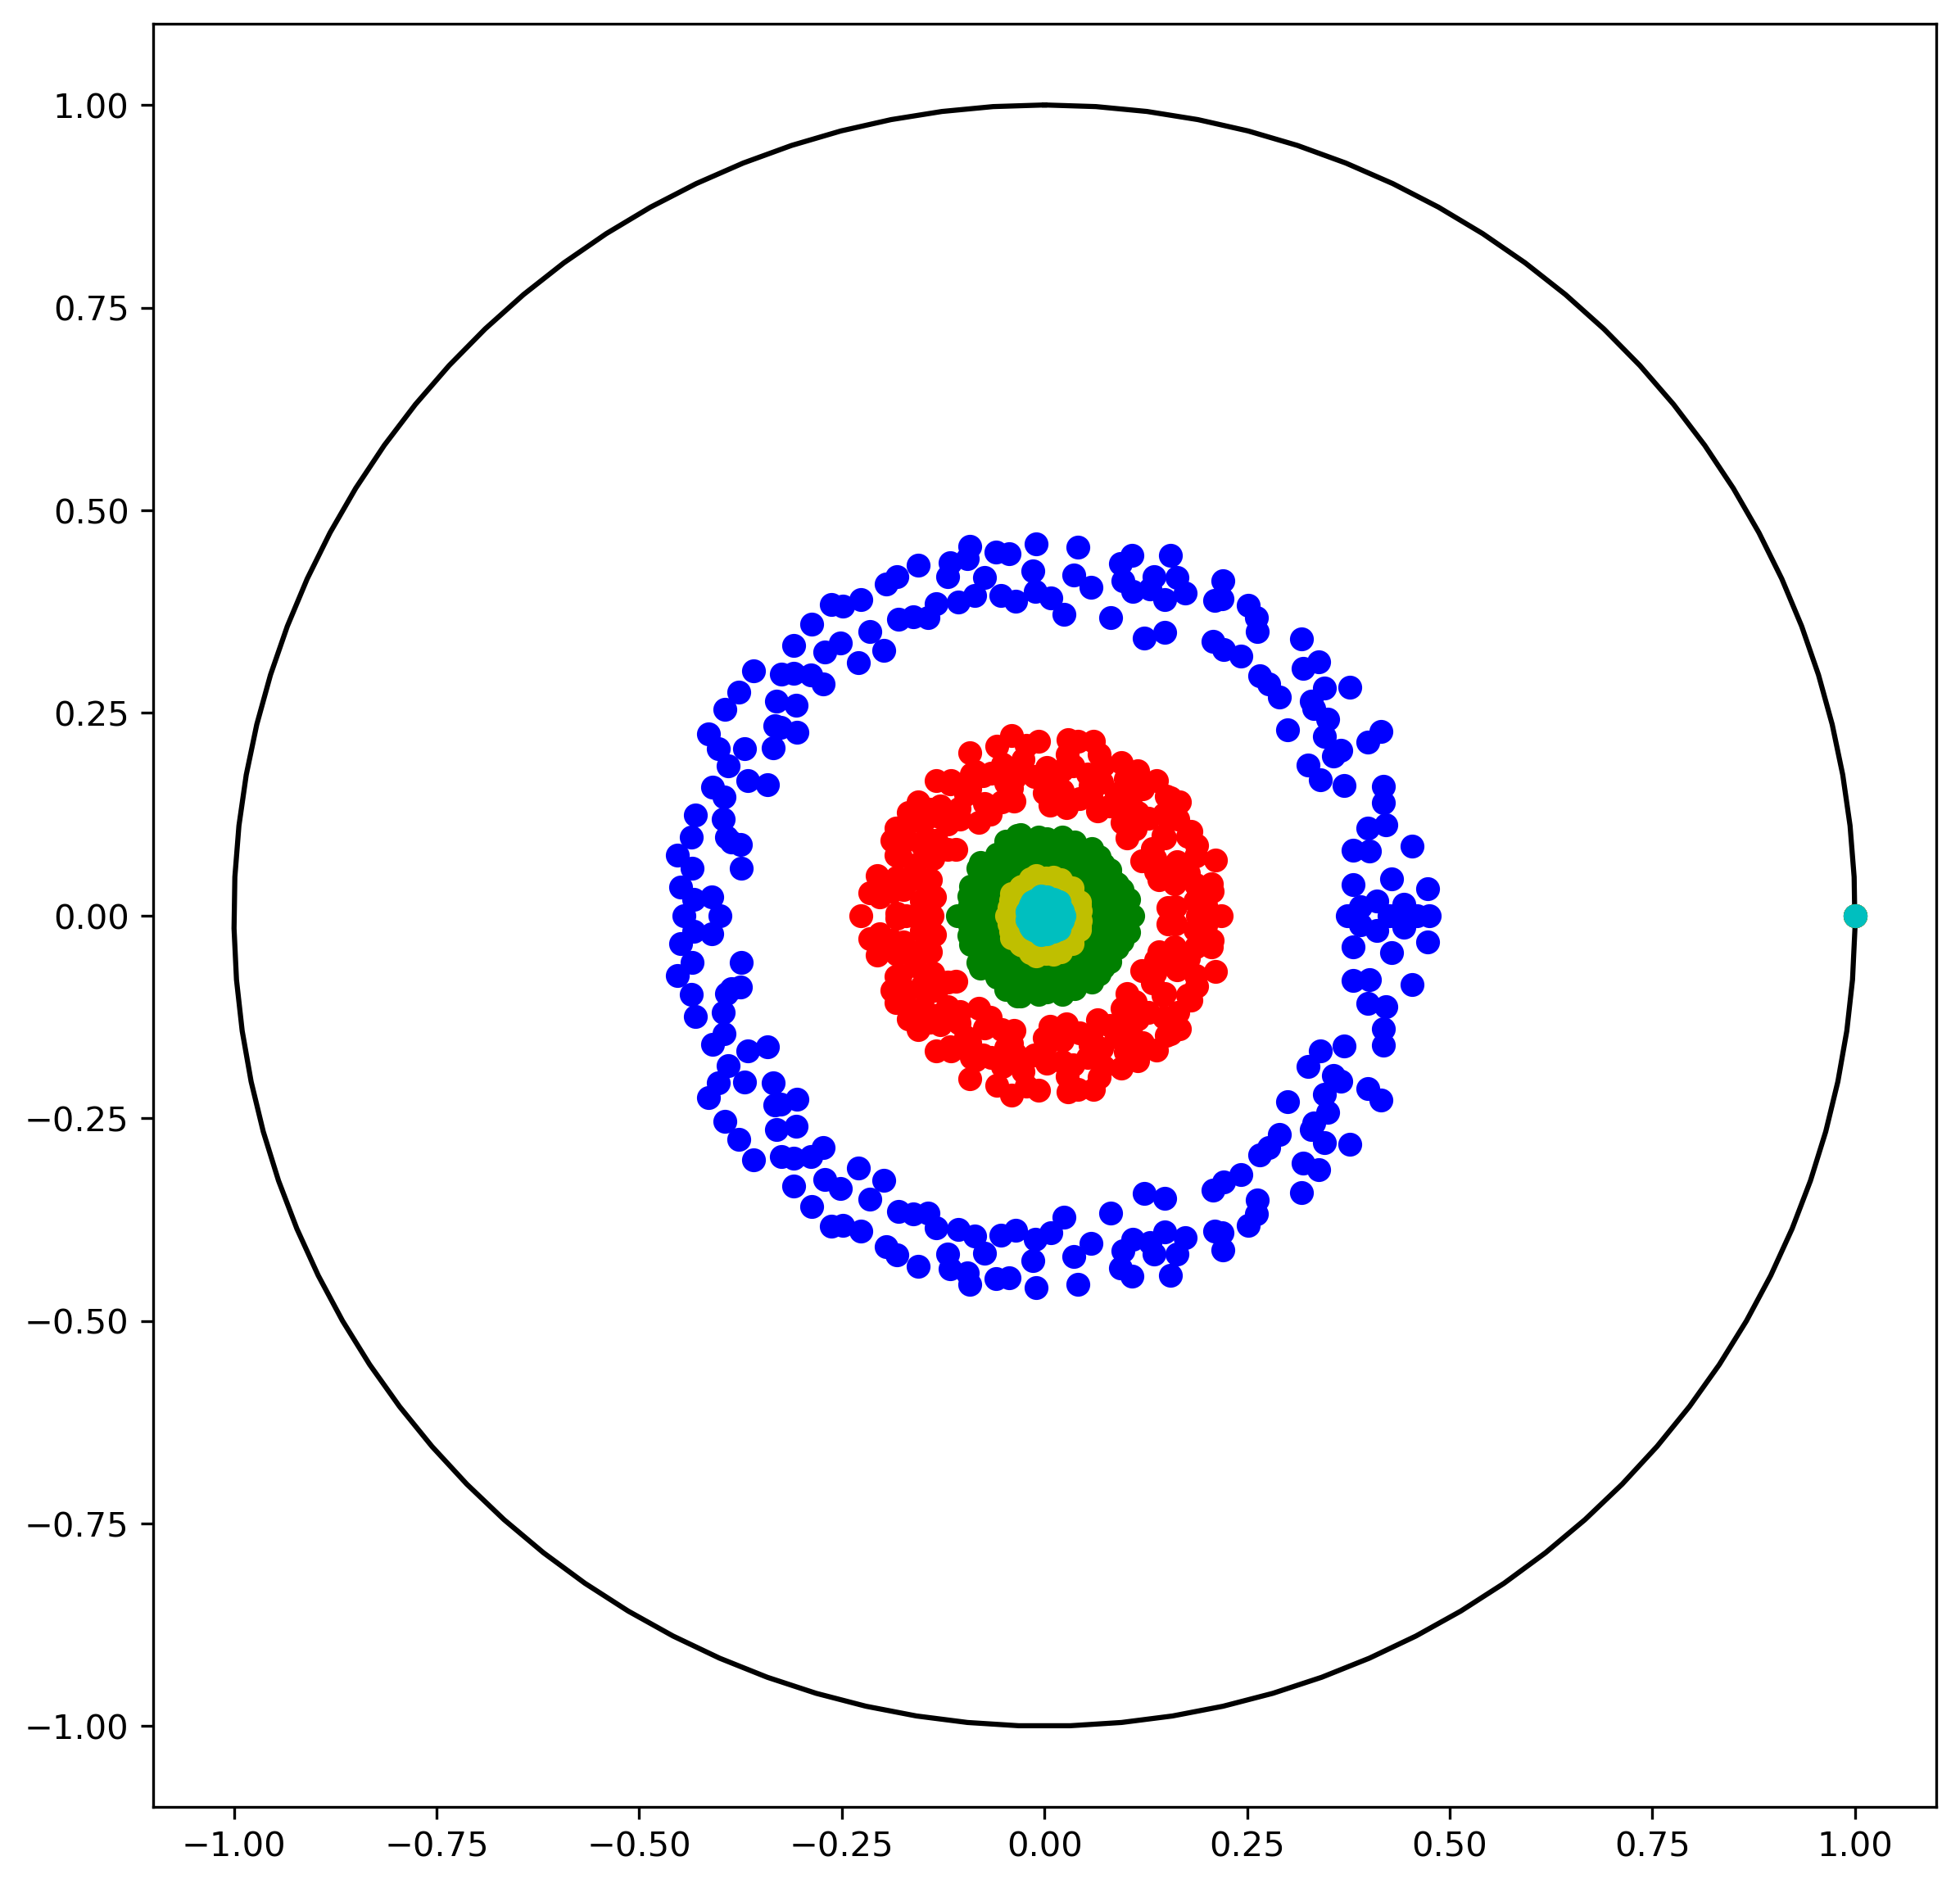

In [17]:
t = np.linspace(0, 2*np.pi, 100)
circle = [np.sin(t), np.cos(t)]

fig = plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle, "k")
plt.plot(spectrum1[:,0], spectrum1[:,1], "bo")
plt.plot(spectrum2[:,0], spectrum2[:,1], "ro")
plt.plot(spectrum3[:,0], spectrum3[:,1], "go")
plt.plot(spectrum4[:,0], spectrum4[:,1], "yo")
plt.plot(spectrum5[:,0], spectrum5[:,1], "co")

In [18]:
x = [8, 16, 24, 32, 40]

results1 = find_outer_inner_R(spectrum1[:-1], tail_num=10)
results2 = find_outer_inner_R(spectrum2[:-1], tail_num=10)
results3 = find_outer_inner_R(spectrum3[:-1], tail_num=10)
results4 = find_outer_inner_R(spectrum4[:-1], tail_num=10)
results5 = find_outer_inner_R(spectrum5[:-1], tail_num=10)

results = results1 + results2 + results3 + results4 + results5
results = np.array(results).reshape(-1, 4)

R_plus      = results[:,0]
R_minus     = results[:,1]
R_plus_std  = results[:,2]
R_minus_std = results[:,3]

c:\Users\krist\anaconda3\envs\env_qiskit\lib\site-packages\numpy\ma\core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


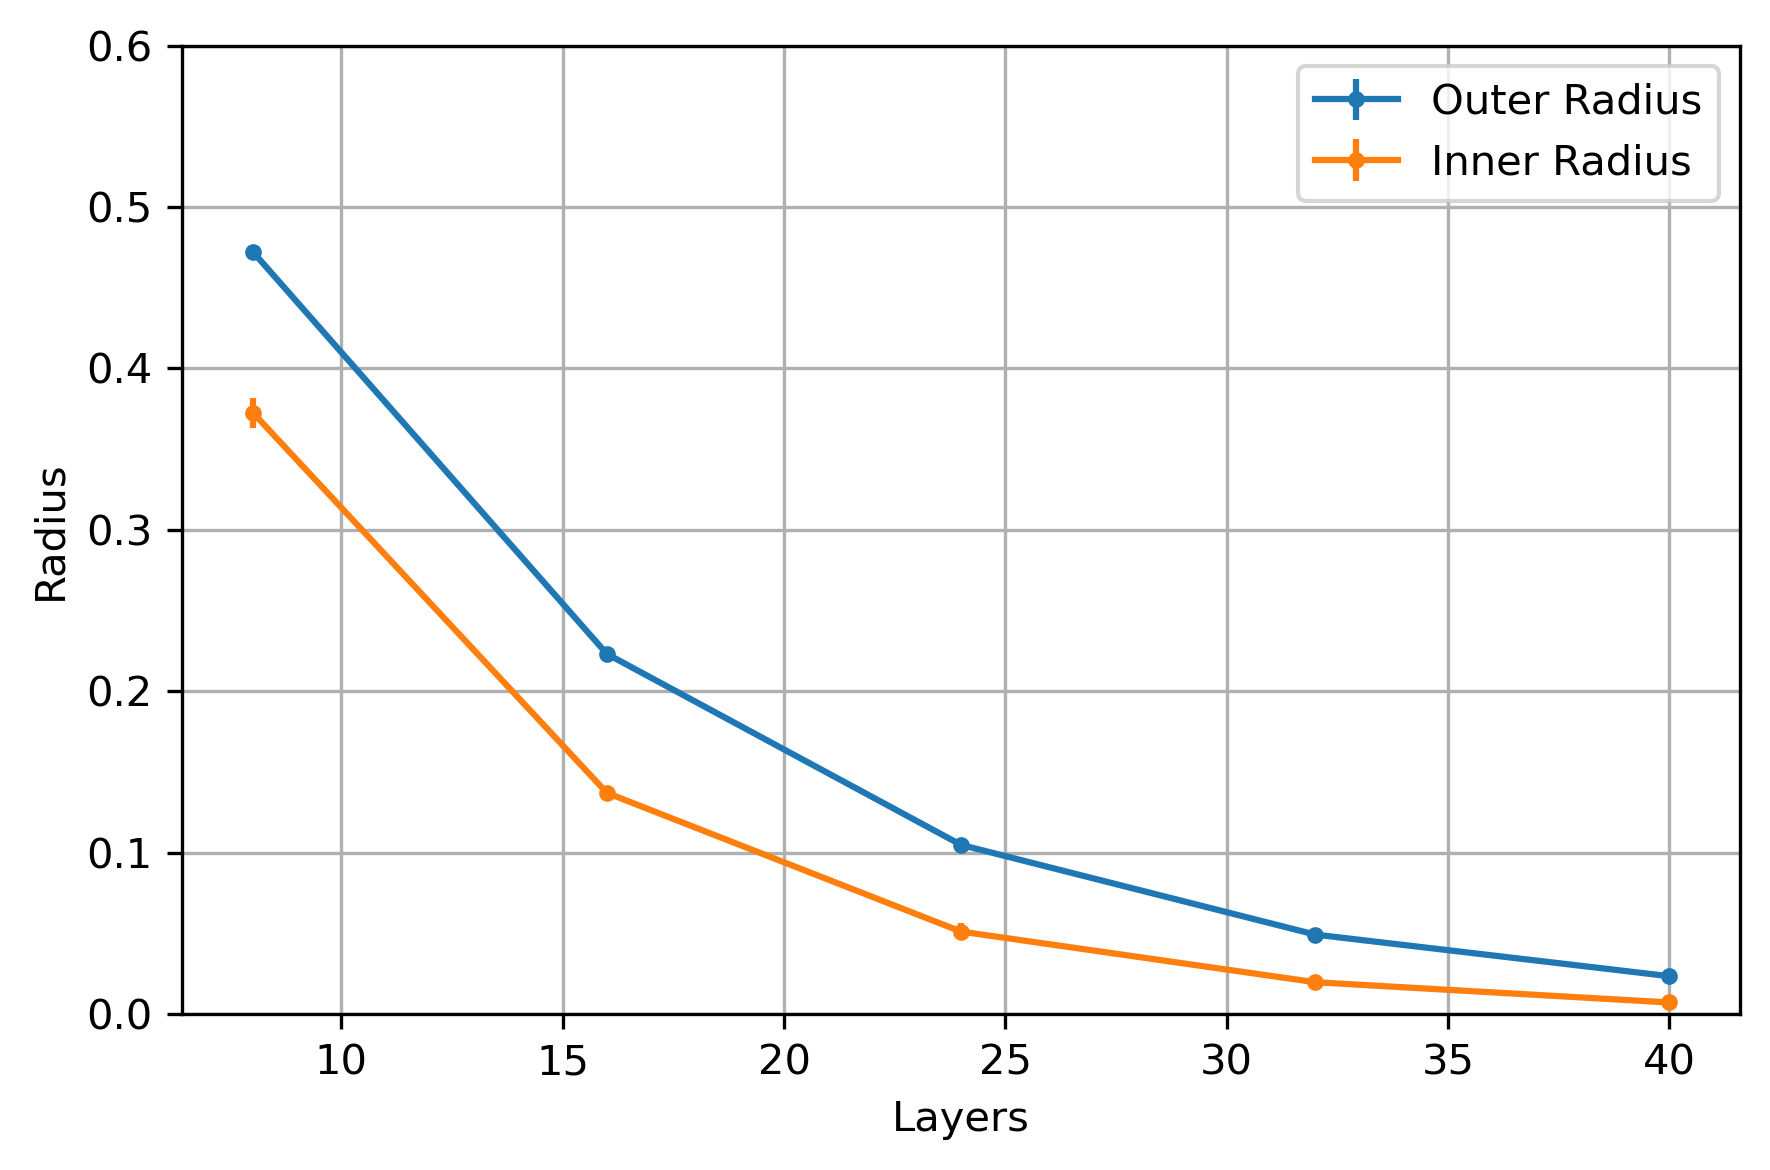

In [19]:
fig = plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')

plt.errorbar(x, R_plus, yerr=2*R_plus_std, fmt="-o", markersize=3)
plt.errorbar(x, R_minus, yerr=2*R_minus_std, fmt="-o", markersize=3)
#plt.plot(x, R_plus-R_minus, "o")
plt.ylim([0,0.6])
plt.grid()
plt.xlabel("Layers")
plt.ylabel("Radius")
plt.legend(["Outer Radius", "Inner Radius", "Differance"])
plt.savefig("figures/" + "synthetic_4qubit_repeated.pdf")
plt.savefig("figures/" + "synthetic_4qubit_repeated.png")
plt.show()

## Delay

In [20]:
n = 4
d = n**2

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

kraus_map = KrausMap(d, rank=3)
noise_map = DilutedChannel(IdentityChannel(d), kraus_map, p=0.16)

channel1 = diluted_repeated_circuit(4, 1, 0.55, 8)
spectrum1 = channel1.spectrum()

channel2 = ConcatChannel([channel1, noise_map])
spectrum2 = channel2.spectrum()

channel3 = ConcatChannel([channel2, noise_map])
spectrum3 = channel3.spectrum()

channel4 = ConcatChannel([channel3, noise_map])
spectrum4 = channel4.spectrum()

channel5 = ConcatChannel([channel4, noise_map])
spectrum5 = channel5.spectrum()

channel6 = ConcatChannel([channel5, noise_map])
spectrum6 = channel6.spectrum()

channel7 = ConcatChannel([channel6, noise_map])
spectrum7 = channel7.spectrum()

channel8 = ConcatChannel([channel7, noise_map])
spectrum8 = channel8.spectrum()

channel9 = ConcatChannel([channel8, noise_map])
spectrum9 = channel9.spectrum()

c:\Users\krist\anaconda3\envs\env_qiskit\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


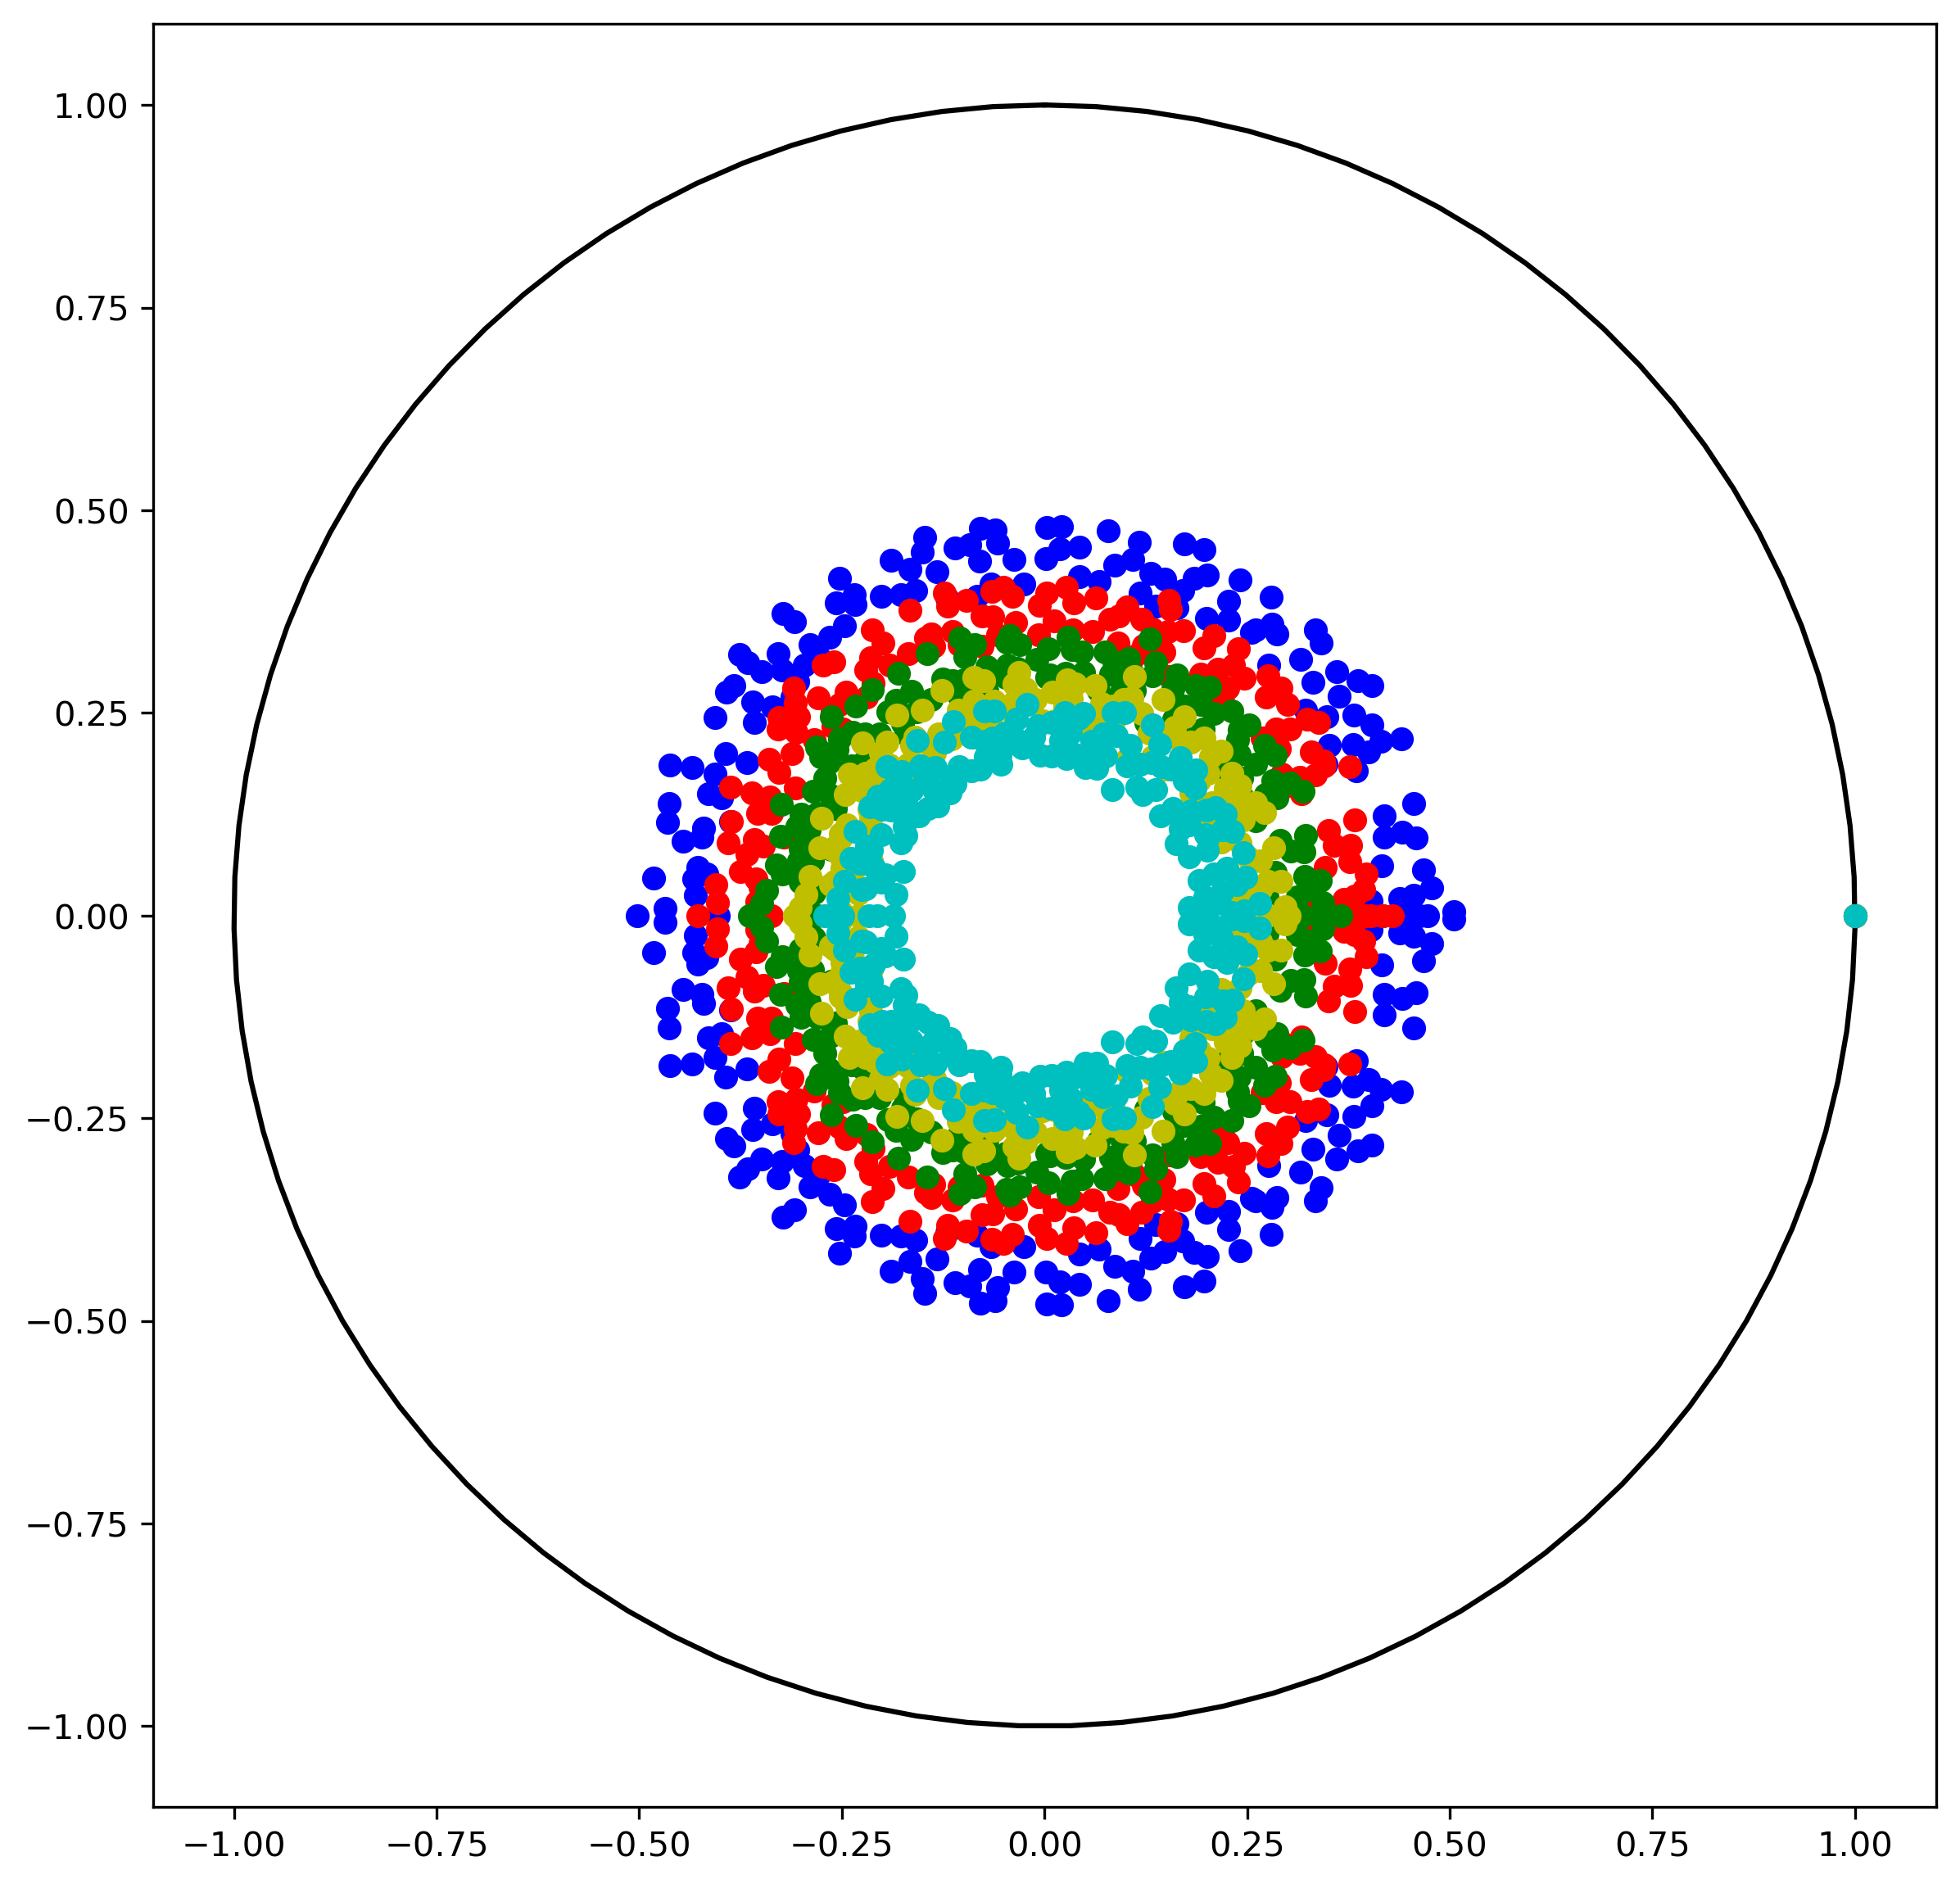

In [21]:
t = np.linspace(0, 2*np.pi, 100)
circle = [np.sin(t), np.cos(t)]

fig = plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle, "k")
plt.plot(spectrum1[:,0], spectrum1[:,1], "bo")
plt.plot(spectrum2[:,0], spectrum2[:,1], "ro")
plt.plot(spectrum3[:,0], spectrum3[:,1], "go")
plt.plot(spectrum4[:,0], spectrum4[:,1], "yo")
plt.plot(spectrum5[:,0], spectrum5[:,1], "co")
#plt.legend(["_","8","16", "24", "32", "40"])

In [22]:
results1 = find_outer_inner_R(spectrum1[:-1], tail_num=10)
results2 = find_outer_inner_R(spectrum2[:-1], tail_num=10)
results3 = find_outer_inner_R(spectrum3[:-1], tail_num=10)
results4 = find_outer_inner_R(spectrum4[:-1], tail_num=10)
results5 = find_outer_inner_R(spectrum5[:-1], tail_num=10)
results6 = find_outer_inner_R(spectrum6[:-1], tail_num=10)
results7 = find_outer_inner_R(spectrum7[:-1], tail_num=10)
results8 = find_outer_inner_R(spectrum8[:-1], tail_num=10)
results9 = find_outer_inner_R(spectrum9[:-1], tail_num=10)

results = results1 + results3 + results4 + results5 + results6 + results7 + results8 + results9
results = np.array(results).reshape(-1, 4)

R_plus_4q      = results[:,0]
R_minus_4q     = results[:,1]
R_plus_std_4q  = results[:,2]
R_minus_std_4q = results[:,3]

c:\Users\krist\anaconda3\envs\env_qiskit\lib\site-packages\numpy\ma\core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


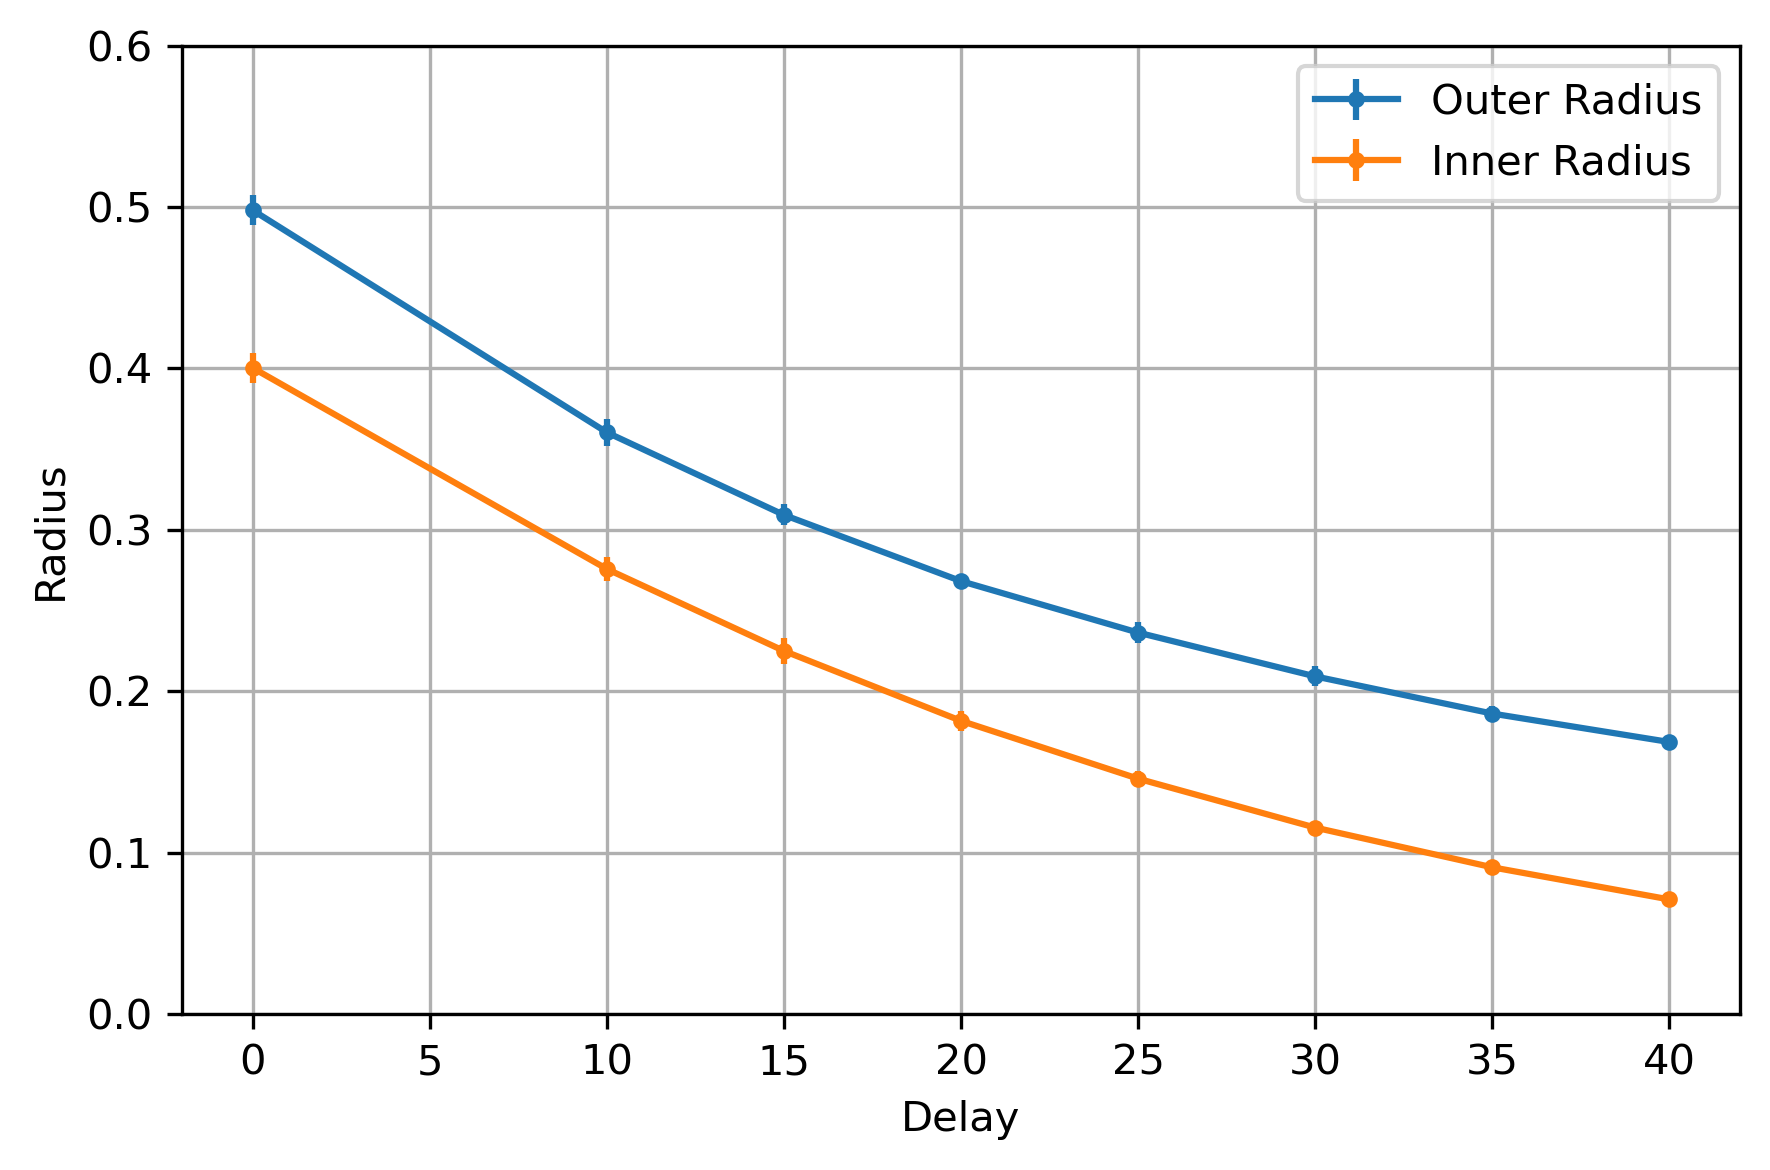

In [23]:
x_4q = [0, 10, 15, 20, 25, 30, 35, 40]

fig = plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')

plt.errorbar(x_4q, R_plus_4q, yerr=2*R_plus_std_4q, fmt="-o", markersize=3)
plt.errorbar(x_4q, R_minus_4q, yerr=2*R_minus_std_4q, fmt="-o", markersize=3)
#plt.plot(x, R_plus-R_minus, "o")
plt.ylim([0,0.6])
plt.grid()
plt.xlabel("Delay")
plt.ylabel("Radius")
plt.legend(["Outer Radius", "Inner Radius", "Differance"])
plt.savefig("figures/" + "synthetic_4qubit_delay.pdf")
plt.savefig("figures/" + "synthetic_4qubit_delay.png")
plt.show()